In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

##Pandas

In [3]:
heart_data = pd.read_csv("heart.csv")
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
heart_data.iloc[0:10]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
all_Ages = heart_data["Age"]
all_Heart_Disease = heart_data["HeartDisease"]
all_Colesterol = heart_data["Cholesterol"]
all_ChestPain = heart_data["ChestPainType"]
Age_x_Heart = pd.DataFrame({"Age":all_Ages,"HeartDisease":all_Heart_Disease, "Colestrol":all_Colesterol, "ChestPainType": all_ChestPain})
Age_x_Heart

,Age,HeartDisease,Colestrol,ChestPainType
0,40,0,289,ATA
1,49,1,180,NAP
2,37,0,283,ATA
3,48,1,214,ASY
4,54,0,195,NAP
...,...,...,...,...
913,45,1,264,TA
914,68,1,193,ASY
915,57,1,131,ASY
916,57,1,236,ATA


In [6]:
Age_x_Heart["ChestPainType"][:20]
#ATA
#NAP
#ASY
#TA

0     ATA
1     NAP
2     ATA
3     ASY
4     NAP
5     NAP
6     ATA
7     ATA
8     ASY
9     ATA
10    NAP
11    ATA
12    ATA
13    ASY
14    NAP
15    ATA
16    ASY
17    ATA
18    ASY
19    ATA
Name: ChestPainType, dtype: object

In [7]:
x = Age_x_Heart[Age_x_Heart["HeartDisease"] == 1]
x

,Age,HeartDisease,Colestrol,ChestPainType
1,49,1,180,NAP
3,48,1,214,ASY
8,37,1,207,ASY
11,58,1,164,ATA
13,49,1,234,ASY
...,...,...,...,...
912,57,1,241,ASY
913,45,1,264,TA
914,68,1,193,ASY
915,57,1,131,ASY


In [8]:
y = Age_x_Heart[Age_x_Heart["HeartDisease"] == 0]
y

,Age,HeartDisease,Colestrol,ChestPainType
0,40,0,289,ATA
2,37,0,283,ATA
4,54,0,195,NAP
5,39,0,339,NAP
6,45,0,237,ATA
...,...,...,...,...
903,56,0,221,ATA
904,56,0,240,ATA
906,55,0,342,ATA
910,41,0,157,ATA


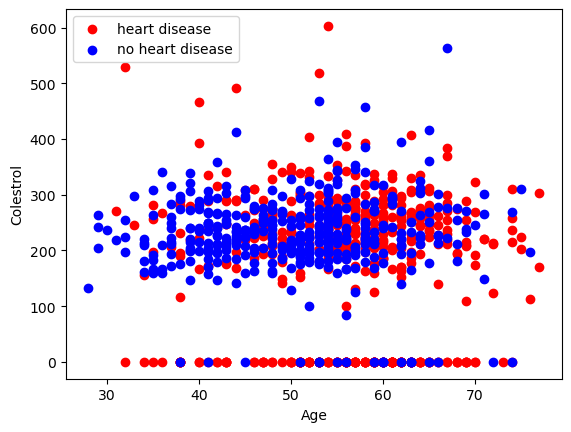

In [9]:
fig, ax = plt.subplots()
ax.scatter(x["Age"],x["Colestrol"], color = "red", label="heart disease")
ax.scatter(y["Age"],y["Colestrol"], color = "blue", label="no heart disease")
ax.set_xlabel('Age')
ax.set_ylabel('Colestrol')
ax.legend()
plt.show()

In [10]:
heart_data.groupby(["Sex", "Age","HeartDisease"]).max()

ChestPainType  RestingBP  Cholesterol  FastingBS  \
Sex Age HeartDisease                                                    
F   30  0                       TA        170          237          0   
    31  0                      ATA        100          219          0   
    32  0                      ATA        105          198          0   
    33  1                      ASY        100          246          0   
    34  0                      ATA        130          210          0   
...                            ...        ...          ...        ...   
M   74  1                       TA        155          310          1   
    75  0                      ASY        160          310          1   
        1                      ASY        170          225          1   
    76  1                      NAP        104          113          0   
    77  1                      ASY        125          304          0   

                     RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  
Sex Age HeartDisease                                                     
F   30  0                    ST    170              N      0.0       Up  
    31  0                    ST    150              N      0.0       Up  
    32  0                Normal    165              N      0.0       Up  
    33  1                Normal    150              Y      1.0     Flat  
    34  0                Normal    192              N      0.7       Up  
...                         ...    ...            ...      ...      ...  
M   74  1                    ST    130              Y      4.0       Up  
    75  0                Normal    112              Y      2.0     Down  
        1                    ST    112              Y      3.0     Flat  
    76  1                   LVH    120              N      3.5     Down  
    77  1                    ST    162              Y      2.0       Up  

[151 rows x 9 columns]

In [11]:
heart_data_shuffeled = heart_data.sample(frac=0.5)

In [12]:
heart_data_shuffeled

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
12,39,M,ATA,120,204,0,Normal,145,N,0.0,Up,0
120,47,F,NAP,135,248,1,Normal,170,N,0.0,Flat,1
782,53,M,NAP,130,197,1,LVH,152,N,1.2,Down,0
158,44,M,ASY,130,290,0,Normal,100,Y,2.0,Flat,1
262,46,M,ASY,120,231,0,Normal,115,Y,0.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,46,M,ASY,134,310,0,Normal,126,N,0.0,Flat,1
747,42,M,ASY,140,226,0,Normal,178,N,0.0,Up,0
183,46,M,ASY,110,238,0,ST,140,Y,1.0,Flat,0
450,52,M,NAP,122,0,0,Normal,110,Y,2.0,Down,1


In [13]:
heart_data_shuffeled["HeartDisease"] = heart_data_shuffeled["HeartDisease"].apply(lambda x: True if x is 1 else False)
heart_data_shuffeled

<>:1: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
C:\Users\pc\AppData\Local\Temp\ipykernel_13644\1205696798.py:1: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
  heart_data_shuffeled["HeartDisease"] = heart_data_shuffeled["HeartDisease"].apply(lambda x: True if x is 1 else False)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
12,39,M,ATA,120,204,0,Normal,145,N,0.0,Up,False
120,47,F,NAP,135,248,1,Normal,170,N,0.0,Flat,True
782,53,M,NAP,130,197,1,LVH,152,N,1.2,Down,False
158,44,M,ASY,130,290,0,Normal,100,Y,2.0,Flat,True
262,46,M,ASY,120,231,0,Normal,115,Y,0.0,Flat,True
...,...,...,...,...,...,...,...,...,...,...,...,...
609,46,M,ASY,134,310,0,Normal,126,N,0.0,Flat,True
747,42,M,ASY,140,226,0,Normal,178,N,0.0,Up,False
183,46,M,ASY,110,238,0,ST,140,Y,1.0,Flat,False
450,52,M,NAP,122,0,0,Normal,110,Y,2.0,Down,True


##Numpy

In [14]:
one_array = np.array([[1,2,3],[4,5,6],[7,8,9]])
one_array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [15]:
one_dataframe = pd.DataFrame(one_array)
one_dataframe

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [16]:
#arange
arange_array = np.arange(0,11,2)
arange_array

array([ 0,  2,  4,  6,  8, 10])

In [17]:
#random.randint
random_array = np.random.randint(0,11, size=(3,3))
random_array

array([[10,  0,  7],
       [ 8,  6,  1],
       [ 4,  0,  0]])

In [18]:
#random.random
random_array2 = np.random.random((3,3))
random_array2

array([[0.41215044, 0.10689095, 0.92739303],
       [0.68572942, 0.56808545, 0.73005936],
       [0.15443054, 0.70012485, 0.24703302]])

In [19]:
#random.rand
random_array3 = np.random.rand(3,3)
random_array3

array([[0.71031993, 0.49366645, 0.16341013],
       [0.81247792, 0.10384536, 0.70762142],
       [0.72433458, 0.32008176, 0.55832393]])

In [20]:
#pesudo-random numbers
#if seed input has any number the random numbers in array doesnot change everytime when the cell is run
np.random.seed(6)
random_array4 = np.random.randint(0,10,size=(3,3))
random_array4

array([[9, 3, 4],
       [0, 9, 1],
       [9, 1, 4]])

In [21]:
#viewing and slicing
random_array5 =np.random.randint(10,size=(2,3,4,5))
random_array5

array([[[[1, 8, 2, 4, 2],
         [5, 9, 6, 2, 5],
         [5, 1, 4, 5, 0],
         [2, 2, 3, 5, 9]],

        [[5, 2, 7, 8, 5],
         [6, 3, 5, 1, 2],
         [3, 6, 9, 9, 8],
         [0, 3, 7, 4, 8]],

        [[1, 2, 4, 1, 5],
         [5, 6, 1, 9, 0],
         [5, 8, 9, 1, 2],
         [2, 9, 5, 4, 1]]],


       [[[6, 3, 1, 4, 9],
         [8, 4, 6, 2, 9],
         [6, 2, 5, 2, 7],
         [5, 1, 1, 7, 5]],

        [[4, 2, 8, 8, 7],
         [8, 0, 8, 9, 2],
         [0, 7, 6, 0, 7],
         [5, 1, 8, 5, 9]],

        [[6, 3, 7, 7, 5],
         [3, 8, 7, 3, 5],
         [9, 3, 8, 0, 7],
         [7, 0, 3, 5, 3]]]])

In [22]:
random_array5[1:2,2:3,:1,:5]

array([[[[6, 3, 7, 7, 5]]]])

In [23]:
#all arethmatic operations can be done unless two different matrics donot have same shape.
#so for that we have to use ('.reshape')

In [24]:
random_array4

array([[9, 3, 4],
       [0, 9, 1],
       [9, 1, 4]])

In [25]:
random_array4.reshape(3,3)

array([[9, 3, 4],
       [0, 9, 1],
       [9, 1, 4]])

In [26]:
random_array_deleted = np.delete(random_array, 0, 1)

In [27]:
random_array_deleted.reshape(3,2)

array([[0, 7],
       [6, 1],
       [0, 0]])

##Dot Product

In [28]:
##Dot Product Example

np.random.seed(523)
weekly_sales_data = np.random.randint(20,size=(5,3))
weekly_sales_data

array([[ 7, 16,  1],
       [ 2,  7, 11],
       [19, 17, 12],
       [19,  6, 18],
       [ 0,  1, 19]])

In [29]:
prices = np.array([10,8,9])
prices

array([10,  8,  9])

In [30]:
weekly_sales = pd.DataFrame(weekly_sales_data,index=["Mon", "tue","wed","thru","fri"],columns=["Kisan","Tata","Rilaence"])
price_per_jur = pd.DataFrame(prices.reshape(1,3),index=["price"],columns=["Kisan","Tata","Rilaence"])

weekly_sales

,Kisan,Tata,Rilaence
Mon,7,16,1
tue,2,7,11
wed,19,17,12
thru,19,6,18
fri,0,1,19


In [31]:
price_per_jur

,Kisan,Tata,Rilaence
price,10,8,9


In [32]:
price_per_jur.T

,price
Kisan,10
Tata,8
Rilaence,9


In [33]:
price_per_jur

,Kisan,Tata,Rilaence
price,10,8,9


In [34]:
#weekly_sales.drop("Total sales", axis =1,inplace=True)

In [35]:
price_per_jur.shape

(1, 3)

In [36]:
weekly_sales.shape

(5, 3)

In [37]:
total_sales = weekly_sales.dot(price_per_jur.T)

In [38]:
weekly_sales

,Kisan,Tata,Rilaence
Mon,7,16,1
tue,2,7,11
wed,19,17,12
thru,19,6,18
fri,0,1,19


In [39]:
total_sales

,price
Mon,207
tue,175
wed,434
thru,400
fri,179


In [40]:
total_sales.T.shape

(1, 5)

In [41]:
weekly_sales.shape

(5, 3)

In [42]:
weekly_sales["total sales"] = total_sales
weekly_sales

,Kisan,Tata,Rilaence,total sales
Mon,7,16,1,207
tue,2,7,11,175
wed,19,17,12,434
thru,19,6,18,400
fri,0,1,19,179


In [43]:
random_array6 = np.array([[3,2,1],[6,5,4],[9,8,7],[12,11,10]])
random_array6

array([[ 3,  2,  1],
       [ 6,  5,  4],
       [ 9,  8,  7],
       [12, 11, 10]])

###Sorting

In [44]:
random_array6

array([[ 3,  2,  1],
       [ 6,  5,  4],
       [ 9,  8,  7],
       [12, 11, 10]])

In [45]:
np.sort(random_array6)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [46]:
np.argsort(random_array6)

array([[2, 1, 0],
       [2, 1, 0],
       [2, 1, 0],
       [2, 1, 0]], dtype=int64)

In [47]:
random_array6

array([[ 3,  2,  1],
       [ 6,  5,  4],
       [ 9,  8,  7],
       [12, 11, 10]])

In [48]:
np.argmin(random_array6,axis=0)
#compares all the values in the column to find the minimum values index
#so the first '0'(index) in [0,0,0] is the lowest number in the first column that is '3'(value in index), 
#also the second '0'(index) in the array goes to second column '2'(value in index), 
# and finally third '0'(index) goes to third column '1'(value in index)

array([0, 0, 0], dtype=int64)

In [49]:
np.argmax(random_array6,axis=0)
#compares all the values in the column to find the maximum values index
#so the first '3'(index) in [3,3,3] is the highest number in the first column thaat is '12'(value in index), 
#also the '3'(index) in the array goes to second column '11'(value in index), 
# and finally second '3'(index) goes to third column '10'(value in index)

array([3, 3, 3], dtype=int64)

In [50]:
np.argmin(random_array6,axis=1)
#compares all the values in the rows to find the minimum values index
#so the first '2'(index) in [2,2,2,2] is the lowest number in the first row that is '1'(value in index), 
#also the '2'(index) in the array goes to second row '4'(value in index), 
#second '2'(index) goes to third row '7'(value in index)
# finally '2'(index) goes to fourth row '10'(value in index)

array([2, 2, 2, 2], dtype=int64)

In [51]:
np.argmax(random_array6,axis=1)
#compares all the values in the rows to find the maximum values index
#so the first '0'(index) in [0,0,0,0] is the highest number in the first row that is '3'(value in index), 
#also the '0'(index) in the array goes to second row '6'(value in index), 
#second '0'(index) goes to third row '9'(value in index)
# finally '0'(index) goes to fourth row '12'(values in index)

array([0, 0, 0, 0], dtype=int64)